# Data Input and preprocessing

In [1]:
import numpy as np
from function import loadData, show_data, preprocessing, showDistribution, removenans, crossplot, kMeans, Hdbscan, plotResult
from function import kmeans_param, hdbscan_param, calculateAri, calculateAmi, calculateVm, calculateSC, calculateCH, calculateDB
from function import output_2D,plotInputData

## Load Data

In [2]:
data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/output_fields_smooth.npz')

data_list = loadData(data)


## Plot Input Data

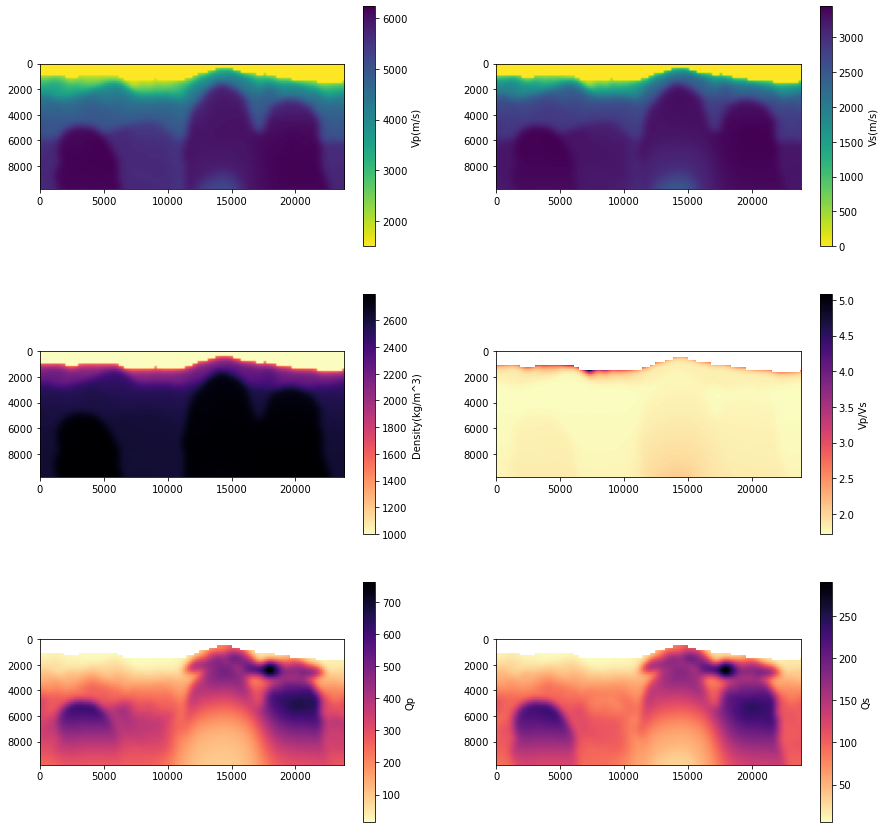

In [3]:
# Move this to a dataclean function
data_inf = np.isinf(data_list[3])
data_list[3][data_inf] = np.nan
data_inf = np.isinf(data_list[1])
data_list[1][data_inf] = np.nan

show_data(data_list,3,2)

In [4]:
new_data,data_noNan,nan_list = removenans(data)

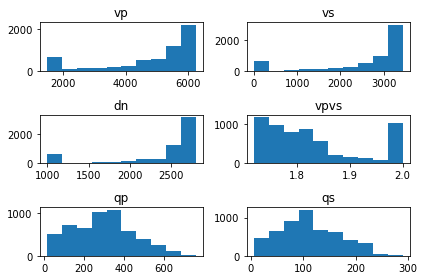

In [5]:
new_data[:,3]=np.clip(new_data[:,3],None,2)
showDistribution(new_data[:,:-2])

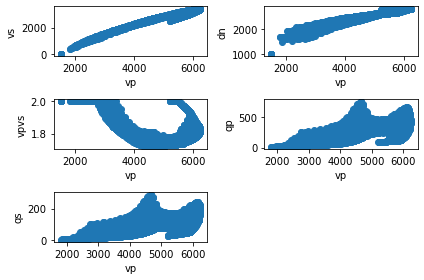

In [6]:
# Rewrite the crossplot function. This function should plot the cross-plot (scatter plot)
# of each pair of physical properties

# Here is an example. Turn it into a nice function like the showDistribution function
crossplot(new_data)

## Data Preprocessing

In [7]:
# I am unsure about what is happening with Standard Scaler
# Try replacing it with a normalization funciton that you write from scratch
#- remove the mean
#- divide by the variance
# Example:

data_preprocessing = preprocessing(data_noNan) 
#data_new = preprocessing(data_list)

(5329, 8)


## Plot Data after Preprocessing

(6000, 8)


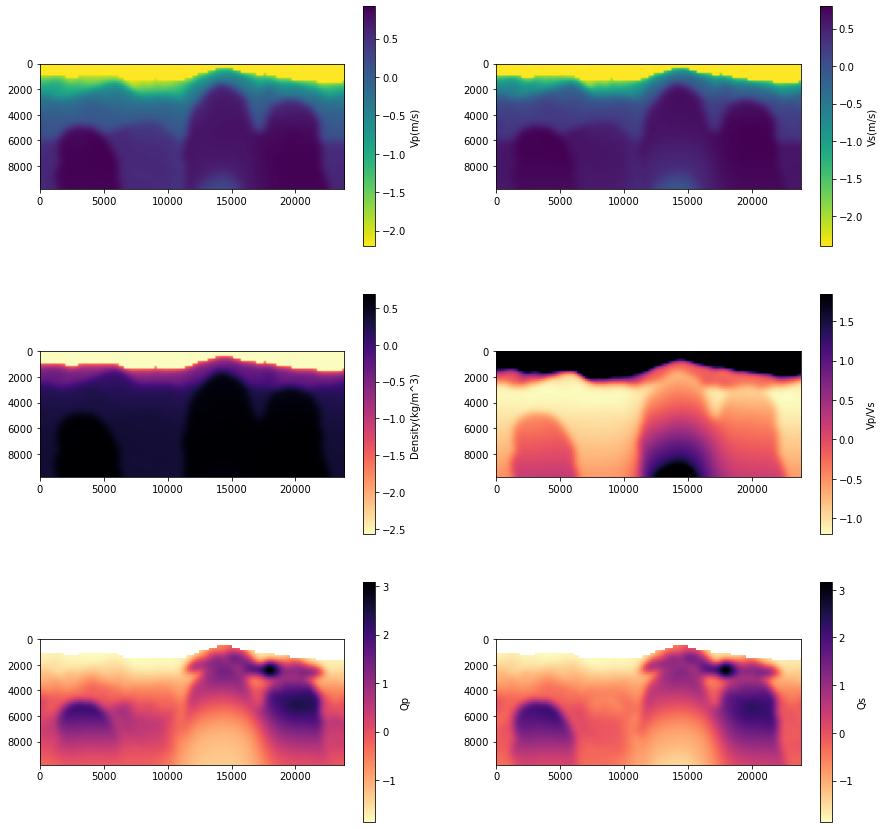

In [8]:
data_list = []
data1 = preprocessing(new_data)
for i in range(data_preprocessing.shape[1]-2):
    data_list.append(data1[:,i].reshape(50,120))
show_data(data_list,3,2)

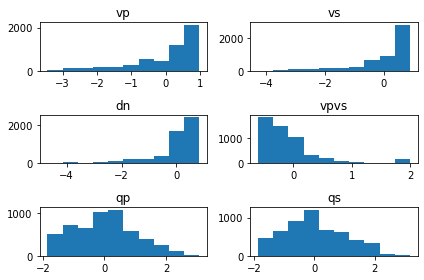

In [9]:
data_preprocessing[:,3]=np.clip(data_preprocessing[:,3],None,2)
showDistribution(data_preprocessing[:,:-2])

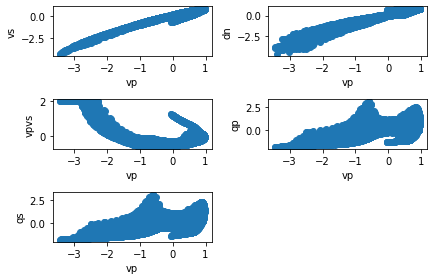

In [10]:
crossplot(data_preprocessing)

## KMeans

In [11]:
result_k = kMeans(4, data_preprocessing[:,:-2])
output_k = output_2D(result_k,nan_list)

6000
(50, 120)


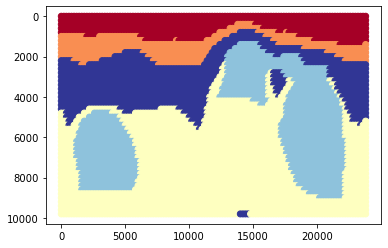

In [12]:
plotResult(data,output_k)

## Tuning Parameters

In [13]:
parameters_k = kmeans_param(data_preprocessing)
print(parameters_k)

{'max_iter': 300, 'n_clusters': 7, 'random_state': 0}


6000
(50, 120)


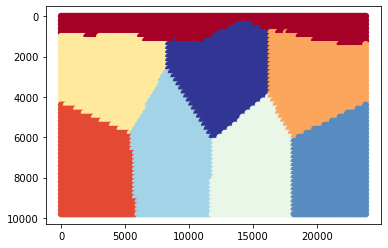

In [14]:
result_k = kMeans(7, data_preprocessing, 300)
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

## Validation
### Calinsky-Harabasz score

In [15]:
ch = calculateCH(data_preprocessing, result_k)
print(ch)

7809.6293522837295


### Silhouette score

In [16]:
sc = calculateSC(data_preprocessing, result_k)
print(sc)

0.36764174416554274


## HDBSCAN

In [18]:
result_h = Hdbscan(4, data_preprocessing)
output_h = output_2D(result_h,nan_list)

6000
(50, 120)


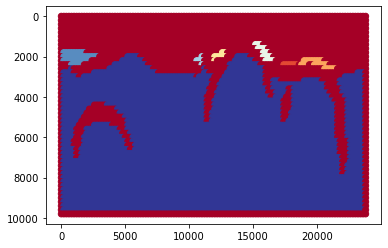

In [19]:
plotResult(data,output_h)

## Tuning Parameters

In [22]:
parameters_h = hdbscan_param(data_preprocessing)
print(parameters_h)

3


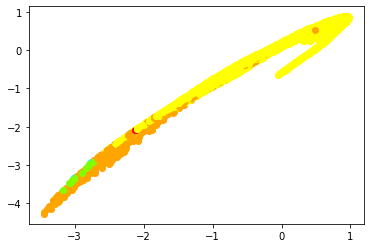

In [23]:
result_h = Hdbscan(3, data_preprocessing)
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)

### Davies Bouldin score

In [25]:
dbscore = calculateDB(data_preprocessing, result_h)
print(dbscore)

1.9050243005277807


## Input Data

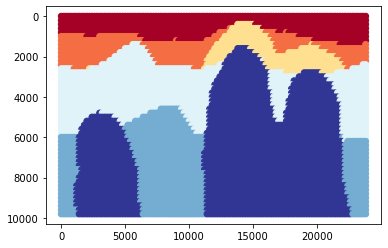

In [20]:
input_data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/input_fields.npz')
plotInputData(input_data)

## Compare KMeans and Input Data

### Adjusted Rand Index

In [26]:
output_k = output_k.reshape(-1)
input_label = input_data['classes'].reshape(-1)
ari = calculateAri(output_k, input_label)
print(ari)

0.2731043716646976


### Adjusted Mutual Information

In [27]:
ami = calculateAmi(result_k, result_h)
print(ami)

0.11467811671902506


### V-measure

In [28]:
vm = calculateVm(result_k, result_h)
print(vm)

0.11763717969793135
